# Gradient Descent for 1D Linear Regression

We generate noisy observations from a straight line, derive the gradient with respect to $w_1$,
and then run gradient descent one manual step at a time.

## Generate training samples

We sample $x$ values in $[-2, 2]$, evaluate the ground-truth linear model, and add Gaussian noise
to obtain the training set $(x_i, y_i)$.

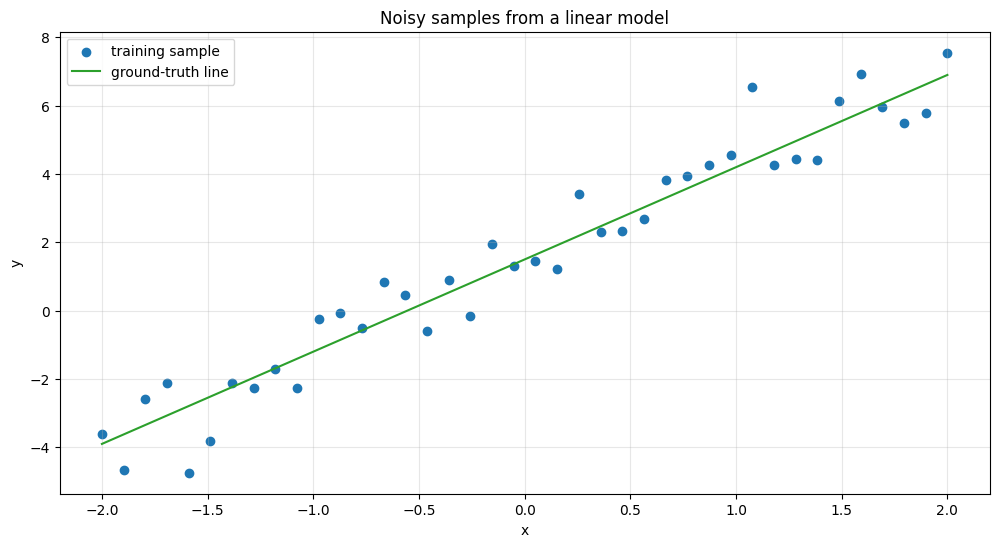

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

true_w0 = 1.5
true_w1 = 2.7
n_samples = 40

x_train = np.linspace(-2.0, 2.0, n_samples)
noise = rng.normal(scale=1.0, size=n_samples)
y_train = true_w0 + true_w1 * x_train + noise

plt.figure(figsize=(12, 6))
plt.scatter(x_train, y_train, color='C0', label='training sample')
plt.plot(x_train, true_w0 + true_w1 * x_train, color='C2', label='ground-truth line')
plt.title('Noisy samples from a linear model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## Understanding the linear model and its gradient

Our prediction function is

$$f(x; w_0, w_1) = w_0 + w_1 x.$$

We fit the model by minimizing the mean-squared-error loss

$$L(w_1) = \frac{1}{n} \sum_{i=1}^n (f(x_i) - y_i)^2,$$

where $n$ is the number of samples and $w_0$ is kept fixed. We want $\frac{\partial L}{\partial w_1}$ so that gradient descent can update $w_1$.

### Step 1: Expand the dependence on $w_1$
Substitute $f(x_i) = w_0 + w_1 x_i$ into the loss:

$$L(w_1) = \frac{1}{n} \sum_{i=1}^n (w_0 + w_1 x_i - y_i)^2.$$

Each summand has the form $(g(w_1))^2$ with $g(w_1) = w_0 + w_1 x_i - y_i$.

### Step 2: Apply the chain rule
Using $\frac{d}{dw}(g(w)^2) = 2 g(w) g'(w)$ we obtain

$$\frac{\partial L}{\partial w_1} = \frac{1}{n} \sum_{i=1}^n 2 (w_0 + w_1 x_i - y_i) \cdot \frac{\partial}{\partial w_1}(w_0 + w_1 x_i - y_i).$$

### Step 3: Differentiate the inner term
Treating $x_i$ and $y_i$ as constants, only $w_1 x_i$ depends on $w_1$. Therefore

$$\frac{\partial}{\partial w_1}(w_0 + w_1 x_i - y_i) = x_i.$$

Plugging this back in gives the full gradient:

$$\frac{\partial L}{\partial w_1} = \frac{2}{n} \sum_{i=1}^n (w_0 + w_1 x_i - y_i) x_i.$$

This is the expression our implementation uses before each gradient-descent update.

In [2]:
def linear_model(x, w0, w1):
    """Compute w0 + w1 * x for scalar or array x."""
    return w0 + w1 * x

def mean_squared_error(y_true, y_pred):
    """Average squared difference between prediction and target."""
    diff = y_pred - y_true
    return float(np.mean(diff ** 2))

def mse_gradient_w1(x, y_true, w0, w1):
    """Gradient of the MSE with respect to w1."""
    y_pred = linear_model(x, w0, w1)
    return float((2.0 / len(x)) * np.sum((y_pred - y_true) * x))

print('Linear model, MSE, and gradient helpers ready.')


Linear model, MSE, and gradient helpers ready.


## Initialize gradient descent

Set a learning rate and random starting values for $(w_0, w_1)$. We plot the current regression line 
alongside the samples and report the initial MSE. Re-run this cell to restart the process.

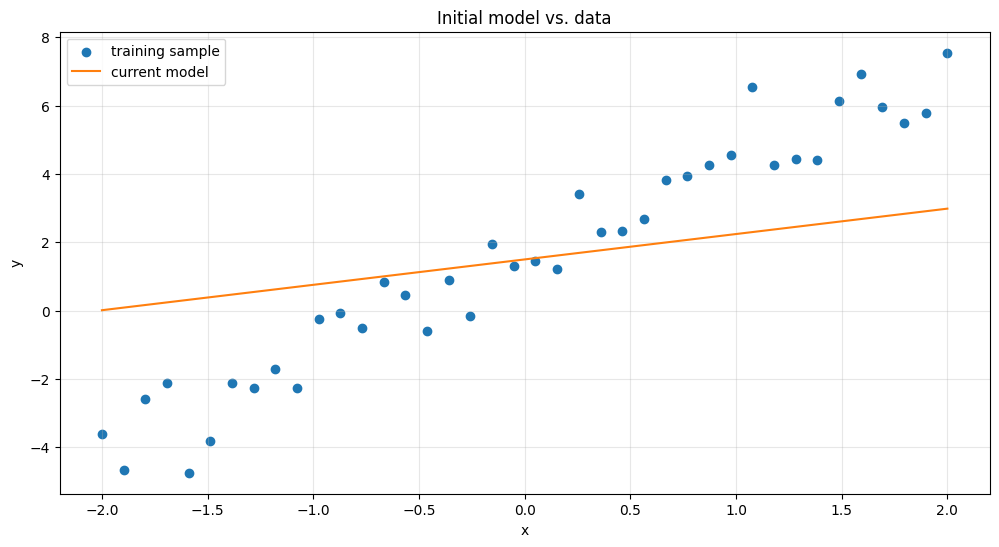

w0 = 1.5000, w1 = 0.7433
Iteration 0, MSE = 6.459979


In [3]:
learning_rate = 0.1
w0 = float(1.5)
w1 = float(rng.normal())

iteration = 0
mse_history = []

predictions = linear_model(x_train, w0, w1)
current_mse = mean_squared_error(y_train, predictions)
mse_history.append(current_mse)

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x_train, y_train, color='C0', label='training sample')
ax.plot(x_train, predictions, color='C1', label='current model')
ax.set_title('Initial model vs. data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid(alpha=0.3)
plt.show()

print(f'w0 = {w0:.4f}, w1 = {w1:.4f}')
print(f'Iteration {iteration}, MSE = {current_mse:.6f}')


£## Take a single gradient-descent step

Each time you run the next cell, we compute the gradient of the MSE with respect to $w_1$, update $w_1$,
    and plot both the regression line (left) and the history of MSE values (right).

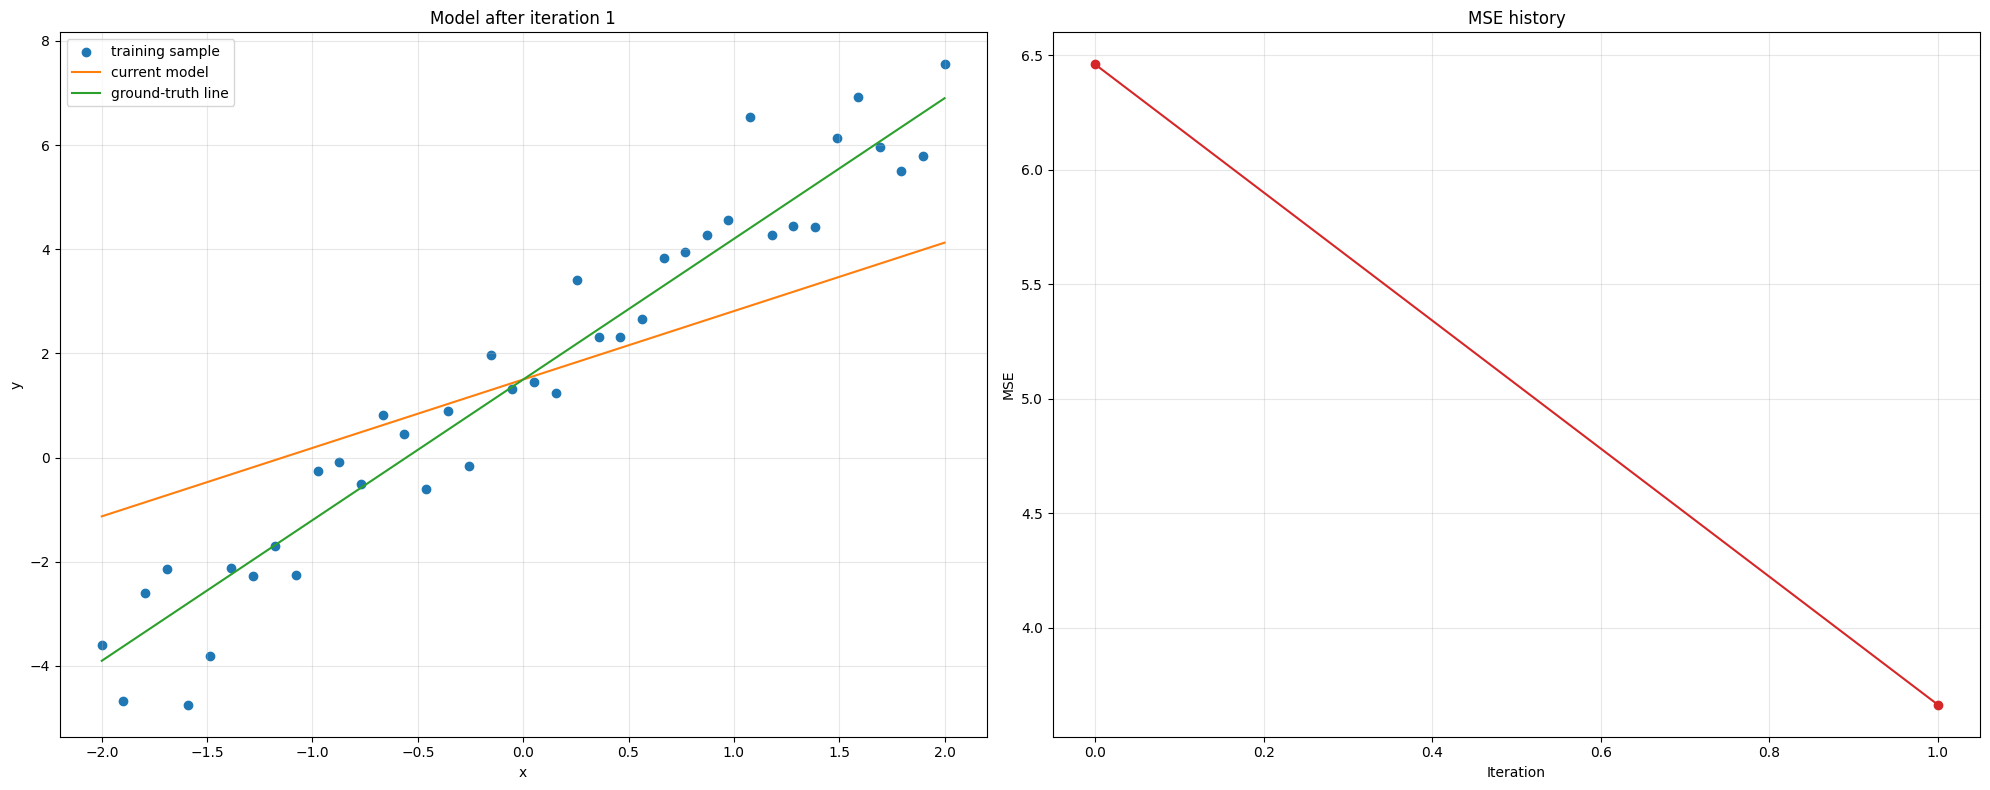

Iteration 1: w1 = 1.313613, gradient = -5.703591
Current MSE = 3.662873
MSE history: 6.459979, 3.662873


In [4]:
try:
    x_train
    y_train
    w0
    w1
    learning_rate
    iteration
    mse_history
except NameError as exc:
    raise RuntimeError('Please run the initialization cell first.') from exc

grad_w1 = mse_gradient_w1(x_train, y_train, w0, w1)
w1 = w1 - learning_rate * grad_w1
iteration += 1

predictions = linear_model(x_train, w0, w1)
current_mse = mean_squared_error(y_train, predictions)
mse_history.append(current_mse)

fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(20, 8))
ax_left.scatter(x_train, y_train, color='C0', label='training sample')
ax_left.plot(x_train, predictions, color='C1', label='current model')
ax_left.plot(x_train, true_w0 + true_w1 * x_train, color='C2', label='ground-truth line')
ax_left.set_title(f'Model after iteration {iteration}')
ax_left.set_xlabel('x')
ax_left.set_ylabel('y')
ax_left.legend()
ax_left.grid(alpha=0.3)

ax_right.plot(range(len(mse_history)), mse_history, marker='o', color='C3')
ax_right.set_title('MSE history')
ax_right.set_xlabel('Iteration')
ax_right.set_ylabel('MSE')
ax_right.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f'Iteration {iteration}: w1 = {w1:.6f}, gradient = {grad_w1:.6f}')
print(f'Current MSE = {current_mse:.6f}')
print('MSE history:', ', '.join(f"{value:.6f}" for value in mse_history))


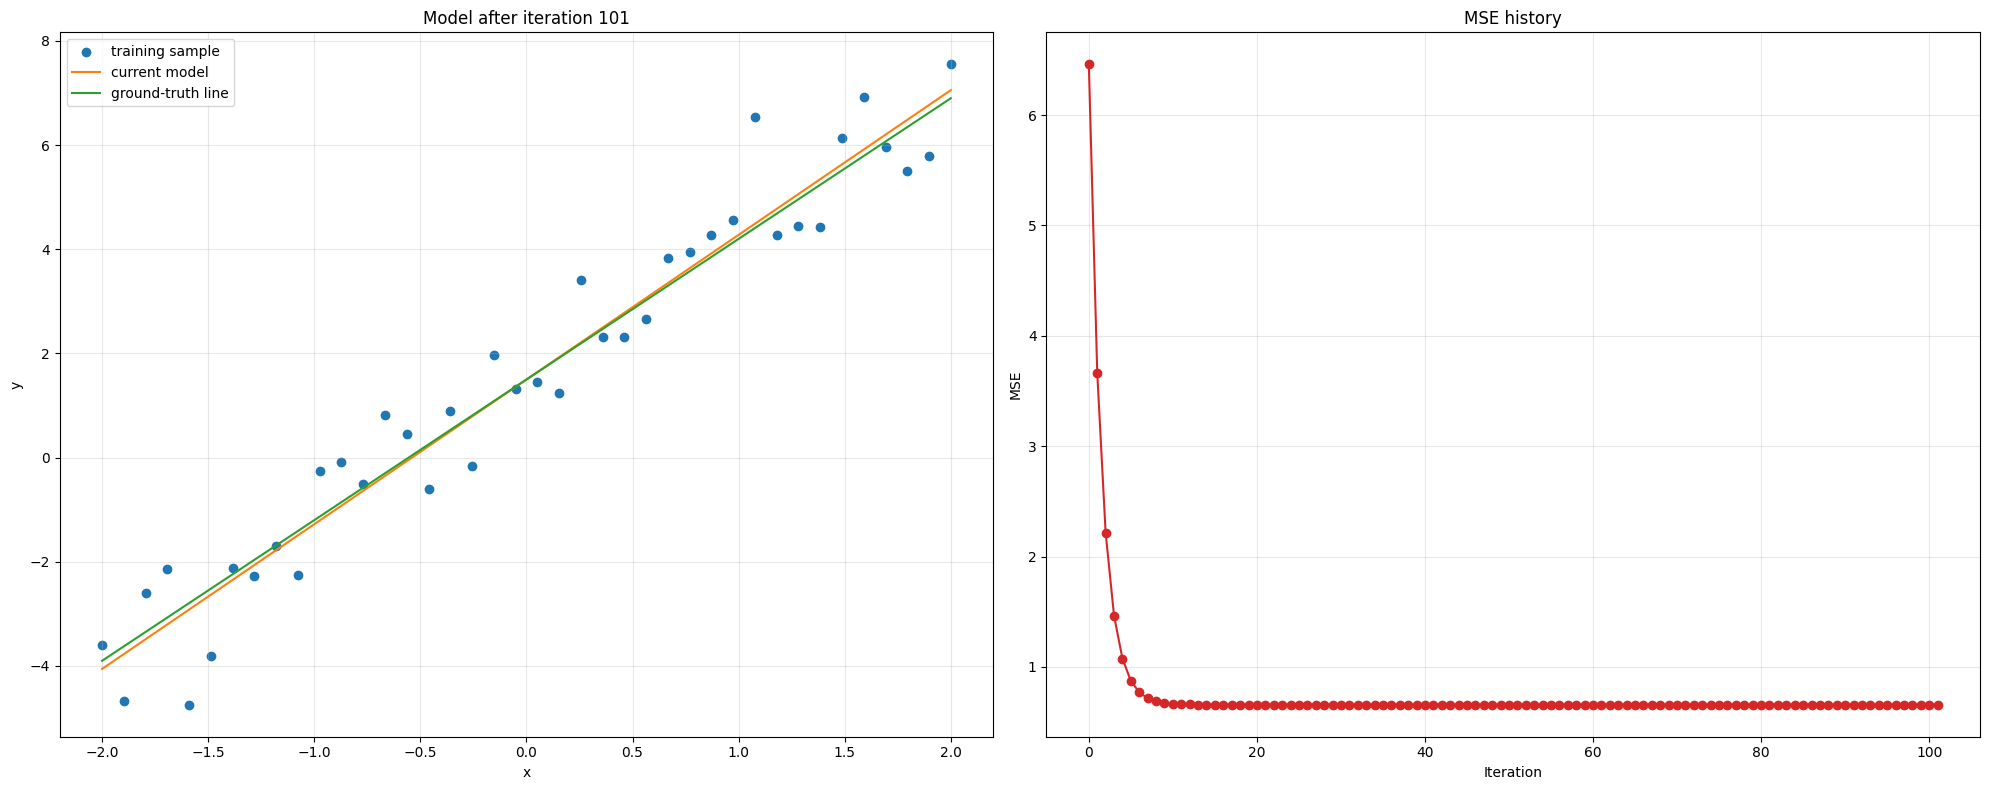

Iteration 101: w1 = 2.777767, gradient = -0.000000
Current MSE = 0.657964
MSE history: 6.459979, 3.662873, 2.214230, 1.463966, 1.075399, 0.874157, 0.769932, 0.715953, 0.687997, 0.673519, 0.666020, 0.662136, 0.660125, 0.659083, 0.658544, 0.658265, 0.658120, 0.658045, 0.658006, 0.657986, 0.657976, 0.657970, 0.657967, 0.657966, 0.657965, 0.657965, 0.657965, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.657964, 0.6

In [5]:
for x in range(100):
    grad_w1 = mse_gradient_w1(x_train, y_train, w0, w1)
    w1 = w1 - learning_rate * grad_w1
    iteration += 1
    predictions = linear_model(x_train, w0, w1)
    current_mse = mean_squared_error(y_train, predictions)
    mse_history.append(current_mse)
# end for

fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(20, 8))
ax_left.scatter(x_train, y_train, color='C0', label='training sample')
ax_left.plot(x_train, predictions, color='C1', label='current model')
ax_left.plot(x_train, true_w0 + true_w1 * x_train, color='C2', label='ground-truth line')
ax_left.set_title(f'Model after iteration {iteration}')
ax_left.set_xlabel('x')
ax_left.set_ylabel('y')
ax_left.legend()
ax_left.grid(alpha=0.3)

ax_right.plot(range(len(mse_history)), mse_history, marker='o', color='C3')
ax_right.set_title('MSE history')
ax_right.set_xlabel('Iteration')
ax_right.set_ylabel('MSE')
ax_right.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f'Iteration {iteration}: w1 = {w1:.6f}, gradient = {grad_w1:.6f}')
print(f'Current MSE = {current_mse:.6f}')
print('MSE history:', ', '.join(f"{value:.6f}" for value in mse_history))